# Testing document for pyGSLModel

### Testing model download and pruning functions

Standard HUMAN-GEM model downlaod test

In [ ]:
# Downloading standard Human-GEM model
from pyGSLModel import download_model

model_1 = download_model()

print(f"Number of Reactions in model : {len(model_1.reactions)}")
print(f"Number of Metabolites in model : {len(model_1.metabolites)}")
print(f"Number of Genes in model : {len(model_1.genes)}")

Converting gene symbols, model pruning, and removing transport reactions test

In [ ]:
# Converting gene names, pruning the model and removing GSl transport reactions
from pyGSLModel import convert_genes, prune_model, remove_GSL_transport

model_2 = convert_genes(model_1)
model_2 = prune_model(model_2)
model_2 = remove_GSL_transport(model_2)

print(f"Number of Reactions in model : {len(model_2.reactions)}")
print(f"Number of Metabolites in model : {len(model_2.metabolites)}")
print(f"Number of Genes in model : {len(model_2.genes)}")

print(f"Checking gene symbol conversion :")
model_2.genes.get_by_id("UGT8")

Testing download of pre-pruned model

In [1]:
# Testing pre-pruned model download
from pyGSLModel import download_GSL_model

model_3 = download_GSL_model()

print(f"Number of Reactions in model : {len(model_3.reactions)}")
print(f"Number of Metabolites in model : {len(model_3.metabolites)}")
print(f"Number of Genes in model : {len(model_3.genes)}")

print(f"Checking gene symbol conversion :")
model_3.genes.get_by_id("UGT8")

Model succesfully downloaded and read in.
Number of Reactions in model : 2312
Number of Metabolites in model : 2015
Number of Genes in model : 2887
Checking gene symbol conversion :


Gene identifier,UGT8
Name,G_UGT8
Memory address,0x17d1640dc50
Functional,True
In 2 reaction(s),"MAR00920, MAR00919"


### Testing performing simulations and analysing results

Performing a generic FBA simulation

In [ ]:
from pyGSLModel import run_metabolic_model, tabulate_model_results, plot_model_results

# Running Basic simulation
sol_1 = run_metabolic_model(model_3, method="FBA",objective_choice="D14_Neuron")

# Preparing dataframe
results_1 = tabulate_model_results(model_3,sol_1)
print(results_1.head())

# Generating plot
fig_1 = plot_model_results(results_1)
fig_1

Performing a knockout simulation

In [ ]:
from pyGSLModel import run_metabolic_model, tabulate_model_results, plot_model_results

# Running Basic simulation
sol_2 = run_metabolic_model(model_3, method="FBA",objective_choice="AC",knockout="B4GALNT1")

# Preparing dataframe
results_2 = tabulate_model_results(model_3,sol_2)
print(results_2.head())

# Generating plot
fig_2 = plot_model_results(results_2)
fig_2

Performing mFBA simulation

In [ ]:
from pyGSLModel import run_metabolic_model, tabulate_model_results, plot_model_results

# Running Basic simulation
sol_3 = run_metabolic_model(model_3, method="mFBA",objective_choice="AC")

# Preparing dataframe
results_3 = tabulate_model_results(model_3,sol_3)
print(results_3.head())

# Generating plot
fig_3 = plot_model_results(results_3)
fig_3

Testing network visualisation. This saves a .html file

In [ ]:
from pyGSLModel import visualise_flux_network

visualise_flux_network(model_3,sol_3,file_path="./flux_network_test.html",height="1080px",width="100%")

Validation of FBA and mFBA

In [2]:
from pyGSLModel import run_metabolic_model
# D14 Simulations
FBA_D14 = run_metabolic_model(model_3, method="FBA",objective_choice="D14_Neuron")
mFBA_D14 = run_metabolic_model(model_3, method="mFBA",objective_choice="D14_Neuron")

# D28 Simulations
FBA_D28 = run_metabolic_model(model_3, method="FBA",objective_choice="D28_Neuron")
mFBA_D28 = run_metabolic_model(model_3, method="mFBA",objective_choice="D28_Neuron")

# AC Simulations
FBA_AC = run_metabolic_model(model_3, method="FBA",objective_choice="AC")
mFBA_AC = run_metabolic_model(model_3, method="mFBA",objective_choice="AC")

# MG Simulations
FBA_MG = run_metabolic_model(model_3, method="FBA",objective_choice="MG")
mFBA_MG = run_metabolic_model(model_3, method="mFBA",objective_choice="MG")

In [3]:
import pandas as pd
from pyGSLModel import tabulate_model_results

cols_interest = ["Key Product","Relative GSL Flux (%)","Lipid Series"]
# D14 results
FBA_D14_res = tabulate_model_results(model_3,FBA_D14)
FBA_D14_res = FBA_D14_res[cols_interest].copy()
FBA_D14_res["Method"] = "FBA"
FBA_D14_res["Cell Type"] = "D14 Neuron"

mFBA_D14_res = tabulate_model_results(model_3,mFBA_D14)
mFBA_D14_res = mFBA_D14_res[cols_interest].copy()
mFBA_D14_res["Method"] = "mFBA"
mFBA_D14_res["Cell Type"] = "D14 Neuron"

# D28 results
FBA_D28_res = tabulate_model_results(model_3,FBA_D28)
FBA_D28_res = FBA_D28_res[cols_interest].copy()
FBA_D28_res["Method"] = "FBA"
FBA_D28_res["Cell Type"] = "D28 Neuron"

mFBA_D28_res = tabulate_model_results(model_3,mFBA_D28)
mFBA_D28_res = mFBA_D28_res[cols_interest].copy()
mFBA_D28_res["Method"] = "mFBA"
mFBA_D28_res["Cell Type"] = "D28 Neuron"

# AC results
FBA_AC_res = tabulate_model_results(model_3,FBA_AC)
FBA_AC_res = FBA_AC_res[cols_interest].copy()
FBA_AC_res["Method"] = "FBA"
FBA_AC_res["Cell Type"] = "AC"

mFBA_AC_res = tabulate_model_results(model_3,mFBA_AC)
mFBA_AC_res = mFBA_AC_res[cols_interest].copy()
mFBA_AC_res["Method"] = "mFBA"
mFBA_AC_res["Cell Type"] = "AC"


# MG results
FBA_MG_res = tabulate_model_results(model_3,FBA_MG)
FBA_MG_res = FBA_MG_res[cols_interest].copy()
FBA_MG_res["Method"] = "FBA"
FBA_MG_res["Cell Type"] = "MG"

mFBA_MG_res = tabulate_model_results(model_3,mFBA_MG)
mFBA_MG_res = mFBA_MG_res[cols_interest].copy()
mFBA_MG_res["Method"] = "mFBA"
mFBA_MG_res["Cell Type"] = "MG"

df_cells = pd.concat([FBA_D14_res,mFBA_D14_res,FBA_D28_res,mFBA_D28_res,FBA_AC_res,mFBA_AC_res,FBA_MG_res,mFBA_MG_res],axis=0)
df_cells = df_cells.copy()

In [12]:
series_map = {
    'GA1':'0-series(ganglio)',
    'GA2':'0-series(ganglio)',
    'GD1c':'0-series(ganglio)',
    'GM1b':'0-series(ganglio)',
    'GD1a':'a-series(ganglio)',
    'GM1':'a-series(ganglio)',
    'GM2':'a-series(ganglio)',
    'GM3':'a-series(ganglio)',
    'GT1a':'a-series(ganglio)',
    'GD1b':'b-series(ganglio)',
    'GD2':'b-series(ganglio)',
    'GD3':'b-series(ganglio)',
    'GQ1b':'b-series(ganglio)',
    'GT1b':'b-series(ganglio)',
    'GQ1c':'c-series(ganglio)',
    'GT1c':'c-series(ganglio)',
    'GT2':'c-series(ganglio)',
    'GT3':'c-series(ganglio)',
    'sialyl-galactosylgloboside':'globo-series',
    'fucosyl-galactosylgloboside':'globo-series',
    'galactosylgloboside':'globo-series',
    'globoside':'globo-series',
    'globotriaosylceramide':'globo-series',
    'lc3Cer':'(neo)lacto-series',
    'lc4Cer':'(neo)lacto-series',
    'lactoneotetraosylceramide':'(neo)lacto-series',
    'sialyl-3-paragloboside':'(neo)lacto-series',
    'type II H glycolipid':'(neo)lacto-series',
    'type I H glycolipid':'(neo)lacto-series',
    'LacCer pool':'LacCer',
    'D-galactosyl-N-acylsphingosine':'gal-series',
    'sulfatide galactocerebroside':'gal-series'
}

# Making D14 Expt Dataframe
D14_Lip = ["GM1b","GD1b","GT1b","GQ1b","GM3","GM2","GM1","GD1a"]
D14_vals = [8,19,29,8,3,3,8,23]
D14_dict = {"Key Product":D14_Lip,
            "Relative GSL Flux (%)":D14_vals}
D14_df = pd.DataFrame(D14_dict)
D14_df["Method"] = "Expt"
D14_df["Cell Type"] = "D14 Neuron"
D14_df["Lipid Series"] = D14_df["Key Product"].map(series_map)

D28_Lip = ["GM1b", "GQ1b", "GD1b", "GT1b", "GM3", "GM1", "GD1a", "GM2"]
D28_vals = [17,6,16,24,1,8,18,10]
D28_dict = {"Key Product":D28_Lip,
            "Relative GSL Flux (%)":D28_vals}
D28_df = pd.DataFrame(D28_dict)
D28_df["Method"] = "Expt"
D28_df["Cell Type"] = "D28 Neuron"
D28_df["Lipid Series"] = D28_df["Key Product"].map(series_map)

AC_Lip = ["GA2", "globotriaosylceramide", "globoside", "galactosylgloboside", "GD3", "lactoneotetraosylceramide","GM3","GM2"]
AC_vals = [23,5,3,7,3,3,50,6]
AC_dict = {"Key Product":AC_Lip,
            "Relative GSL Flux (%)":AC_vals}
AC_df = pd.DataFrame(AC_dict)
AC_df["Method"] = "Expt"
AC_df["Cell Type"] = "AC"
AC_df["Lipid Series"] = AC_df["Key Product"].map(series_map)

MG_Lip = ["GA2", "GD1a", "globotriaosylceramide","globoside","galactosylgloboside","GD3","lactoneotetraosylceramide","GM2","GM3"]
MG_vals = [2,7,11,10,7,2,16,2,43]
MG_dict = {"Key Product":MG_Lip,
            "Relative GSL Flux (%)":MG_vals}
MG_df = pd.DataFrame(MG_dict)
MG_df["Method"] = "Expt"
MG_df["Cell Type"] = "MG"
MG_df["Lipid Series"] = MG_df["Key Product"].map(series_map)

df_compare = pd.concat([df_cells,D14_df,D28_df,AC_df,MG_df],axis=0)
df_compare["Method"] = pd.Categorical(df_compare["Method"],categories=["Expt","FBA","mFBA"],ordered=True)
df_compare["Lipid Series"] = pd.Categorical(df_compare["Lipid Series"],categories=["0-series(ganglio)","a-series(ganglio)","b-series(ganglio)","c-series(ganglio)","globo-series","(neo)lacto-series","gal-series"],ordered=True)
df_compare = df_compare.copy()

[Text(0.5, 0, '')]

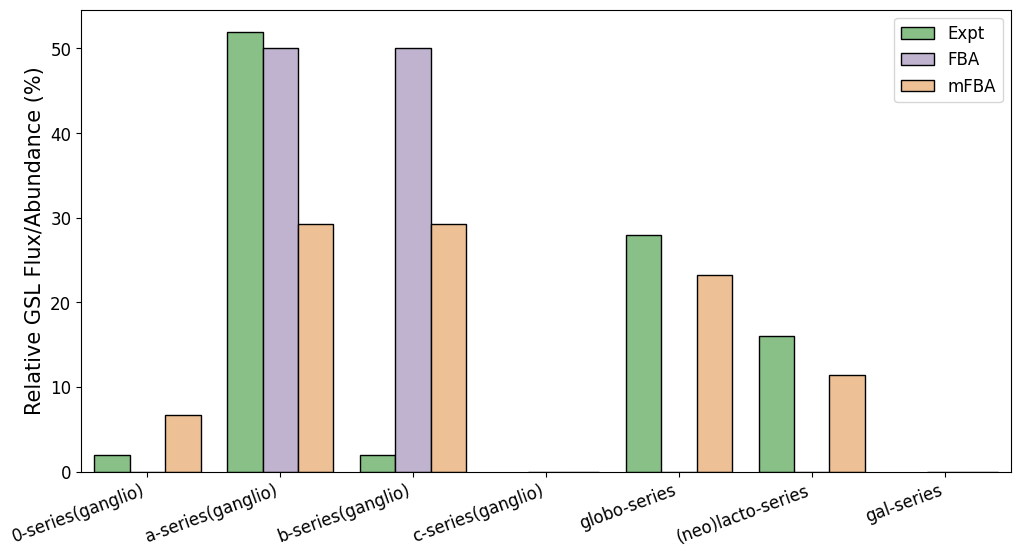

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = df_compare[df_compare["Cell Type"] == "MG"].dropna().copy()
# df_plot = df_plot[df_plot["Method"].isin(["Expt","FBA"])]


fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(df_plot,x="Lipid Series",y="Relative GSL Flux (%)",hue="Method",edgecolor="black",estimator=sum,errorbar=None,palette="Accent")
plt.xticks(rotation = 20,ha="right")
plt.ylabel("Relative GSL Flux/Abundance (%)",fontsize=15)
plt.tick_params(axis='both',which='major',labelsize=12)
plt.legend(fontsize=12)
ax.set(xlabel=None)

In [11]:
df_compare.head()

,Key Product,Relative GSL Flux (%),Lipid Series,Method,Cell Type
9,GD3,20.0,b-series(ganglio),FBA,D14 Neuron
20,GD2,20.0,b-series(ganglio),FBA,D14 Neuron
13,GM3,20.0,a-series(ganglio),FBA,D14 Neuron
15,GD1b,20.0,b-series(ganglio),FBA,D14 Neuron
18,GT1b,20.0,b-series(ganglio),FBA,D14 Neuron


### Transcriptomic integration testing

Testing standard iMAT integration

In [ ]:
import pandas as pd
# Making a dummy dataframe
d = {
    "Gene" : ["B4GALNT1", "ST3GAL5", "ST8SIA1","A4GALT"],
    "Sample_1" : [8,6,4,2]
}

# Converting the dictionary to a pandas dataframe and setting the index to Gene
iMAT_df_1 = pd.DataFrame(d)
iMAT_df_1 = iMAT_df_1.set_index("Gene").copy()

from pyGSLModel import iMAT_integrate, tabulate_model_results
sol_4 = iMAT_integrate(model_3,iMAT_df_1)

results_4 = tabulate_model_results(model_3, sol_4)
results_4.head()

Testing multi sample iMat integration with a dummy dataframe

In [ ]:
import pandas as pd
# Making a dummy dataframe
d = {
    "Gene" : ["B4GALNT1", "ST3GAL5", "ST8SIA1","A4GALT"],
    "Sample_1" : [8,6,4,2],
    "Sample_2" : [2,4,6,8],
    "Sample_3" : [6,2,8,4],
    "Sample_4" : [4,8,2,6]
}

# Converting the dictionary to a pandas dataframe and setting the index to Gene
iMAT_df_1 = pd.DataFrame(d)
iMAT_df_1 = iMAT_df_1.set_index("Gene").copy()

# Performing the iMAT integration for the custom data
from pyGSLModel import iMAT_multi_integrate
iMAT_res_1 = iMAT_multi_integrate(model_3, iMAT_df_1)

iMAT_res_1

Testing average TCGA integration with iMAT

In [ ]:
from pyGSLModel import TCGA_iMAT_integrate

# Lets adjust upper and lower quantiles here to select the top and bottom 15% of genes instead. We're going to leave epsilon and threshold alone
iMAT_TCGA_1, sol_dict = TCGA_iMAT_integrate(model_3, epsilon=10,threshold=0.1)

iMAT_TCGA_1.head()

Testing Integration with example

In [ ]:
import pandas as pd
df_GBM_LGG = pd.read_csv("C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Brain_Vis/df_GBM_LGG.csv")
df_GBM_LGG = df_GBM_LGG.set_index("Gene").copy()
df_GBM_LGG.head()

from pyGSLModel import iMAT_multi_integrate

GBM_LGG_res_df, GBM_LGG_sol = iMAT_multi_integrate(model_3,df_GBM_LGG,upper_quantile=0.5,lower_quantile=0.5,epsilon=40,threshold=20)

In [ ]:
def convert_col(col):
    u_q = col.quantile(0.5)
    l_q = col.quantile(0.5)

    converted = col.copy()
    converted[col > l_q] = 1
    converted[col < u_q] = -1
    converted[(col >= u_q) & (col <= l_q)] = 0

    return converted

convert_col(df_GBM_LGG)

In [ ]:
from pyGSLModel import tabulate_model_results
GBM_dat = tabulate_model_results(model_3,GBM_LGG_sol["GBM_sol"])
GBM_dat["status"] = "GBM"
LGG_1_dat = tabulate_model_results(model_3,GBM_LGG_sol["LGG <1Yr Survival_sol"])
LGG_1_dat["status"] = "LGG <1Yr Survival"
LGG_2_dat = tabulate_model_results(model_3,GBM_LGG_sol["LGG >1 Yr Survival_sol"])
LGG_2_dat["status"] = "LGG >1 Yr Survival"

import pandas as pd
brain_df = pd.concat([GBM_dat,LGG_1_dat,LGG_2_dat],axis=0)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(brain_df,x="Lipid Series",y="Flux (mmol/gDW/hr)",hue="status",edgecolor="black",estimator=sum,errorbar=None)
plt.xticks(rotation = 20,ha="right")
ax.set(xlabel=None)

In [ ]:
from pyGSLModel import visualise_flux_network
visualise_flux_network(model_3,GBM_LGG_sol["GBM_sol"],file_path="C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Brain_Vis/GBM_network.html",height="1080px",width="100%",rxn_col="#1f77b4",met_col="#abdcff")
visualise_flux_network(model_3,GBM_LGG_sol["LGG <1Yr Survival_sol"],file_path="C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Brain_Vis/LGG_network_ls.html",height="1080px",width="100%",rxn_col="#ff7f0e",met_col="#ffca9c")
visualise_flux_network(model_3,GBM_LGG_sol["LGG >1 Yr Survival_sol"],file_path="C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Brain_Vis/LGG_network_gs.html",height="1080px",width="100%",rxn_col="#2ca02c",met_col="#99ed99")

Bile Duct example

In [ ]:
import pandas as pd
df_bd = pd.read_csv("C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Cholangiocarcinoma_Vis/BD_C.csv")
df_bd = df_bd.set_index("Gene").copy()
df_bd.head()

from pyGSLModel import iMAT_multi_integrate

bd_res_df, bd_sol = iMAT_multi_integrate(model_3,df_bd,upper_quantile=0.5,lower_quantile=0.5,epsilon=40,threshold=20)

In [ ]:
from pyGSLModel import tabulate_model_results
cholangio_dat = tabulate_model_results(model_3,bd_sol["Primary Tumor_sol"])
cholangio_dat["status"] = "Cholangiocarcinoma"
bd_dat = tabulate_model_results(model_3,bd_sol["Solid Tissue Normal_sol"])
bd_dat["status"] = "Bile Duct Normal Adjacent Tissue"


import pandas as pd
bdc_df = pd.concat([cholangio_dat,bd_dat],axis=0)
bdc_df.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(bdc_df,x="Lipid Series",y="Flux (mmol/gDW/hr)",hue="status",edgecolor="black",estimator=sum,errorbar=None)
plt.xticks(rotation = 20,ha="right")
ax.set(xlabel=None)

Testing sample wise iMAT integration of TCGA data

In [ ]:
from pyGSLModel import TCGA_iMAT_sample_integrate

# Selecting Bile duct for tissue argument as this has fewer samples (Brain has something like 2000 so takes a while). Leaving other arguments as default
iMAT_TCGA_sample = TCGA_iMAT_sample_integrate(model_3, tissue="Bile duct")

iMAT_TCGA_sample.head()